# Linear Regression model that predicts the outcome for a tennis player based on their playing habits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


# Spliting into Training and Testing

In [3]:
x = df['BreakPointsOpportunities']
y = df['Wins']
x = np.array(x).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)
print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(1376, 1)
(345, 1)
(1376,)
(345,)


# Building Model

In [4]:
slr = LinearRegression()
slr.fit(x_train, y_train)
y_predict = slr.predict(x_test)
print("Train score:")
print(slr.score(x_train, y_train))
print("Test score:")
print(slr.score(x_test, y_test))

Train score:
0.859899598163334
Test score:
0.8280071088197527


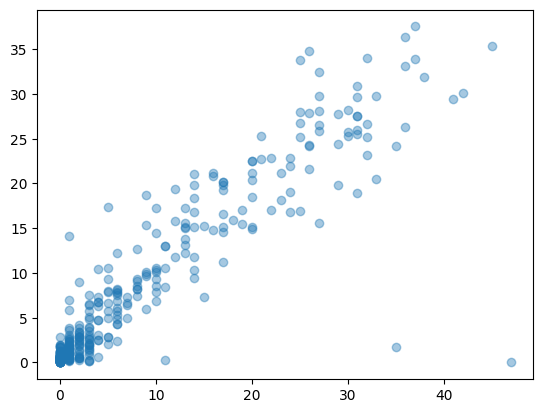

In [5]:
plt.scatter(y_test, y_predict, alpha=0.4)

# Model Evaluation - Residual Analysis

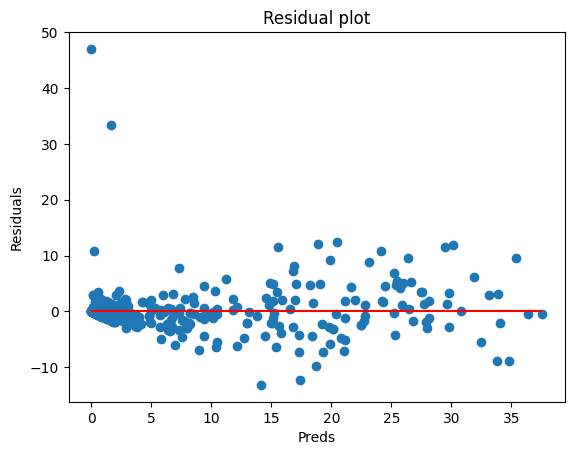

In [6]:
residuals = y_test - y_predict

# 2. Visualize the residuals
plt.scatter(y_predict, residuals)
plt.hlines(y = 0, xmin= y_predict.min(), xmax=y_predict.max(), color='red')
plt.title('Residual plot')
plt.ylabel('Residuals')
plt.xlabel('Preds')
plt.show()

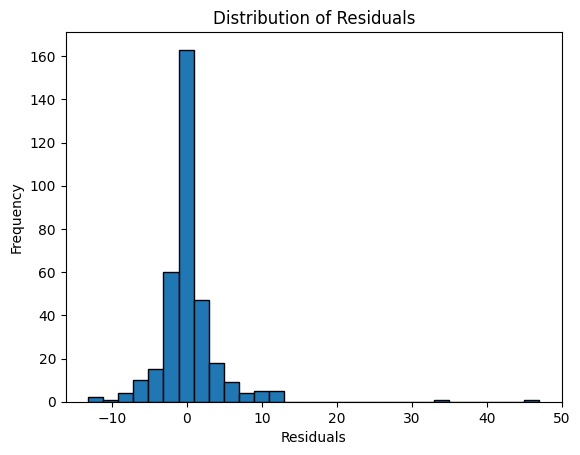

In [7]:
# Check for normality
# Histogram
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

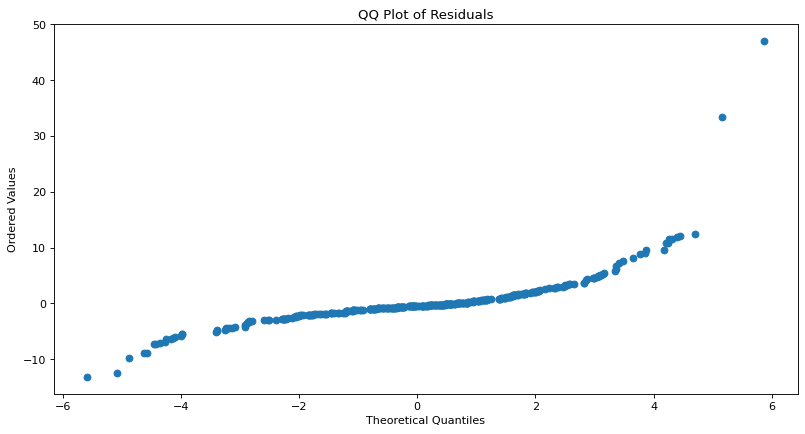

In [8]:
# QQ plot
residuals_sort = sorted(residuals.values.flatten())
norm = np.random.normal(0, 2, len(residuals))
norm.sort()
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(norm, residuals_sort, "o") 
plt.ylabel('Ordered Values')
plt.xlabel('Theoretical Quantiles')
plt.title('QQ Plot of Residuals')
plt.show()

# predicting 'Wins' given 'BreakPointsOpportunities'

In [11]:
new_player_breakpoints_opportunities = np.array([[10], [15], [20]]) 
new_player_breakpoints_opportunities.reshape(-1,1)
predicted_wins = slr.predict(new_player_breakpoints_opportunities)

print(predicted_wins)


[0.7626407  1.14340868 1.52417666]
